## Introduction to Data Science

#### University of Redlands - DATA 101
#### Prof: Joanna Bieri [joanna_bieri@redlands.edu](mailto:joanna_bieri@redlands.edu)
#### [Class Website: data101.joannabieri.com](https://joannabieri.com/data101.html)

---------------------------------------
# Homework Day 8
---------------------------------------

GOALS:

1. Load data into Python that you find online
2. Understand data types and fix some errors
3. Find your own data to play with

----------------------------------------------------------

This homework has **5 questions** and **1 problem**.

NOTE: Be kind to yourself. Working with data can be hard! Every data set is different. **Seriously** come get help! Come to lab!


In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.io as pio
pio.renderers.defaule = 'colab'

You might need to install lxml. If you get a "ImportError: Missing optional dependency 'lxml'" Then uncomment and run the cell below

In [9]:
#!conda install -y lxml

## Try reading in some data - csv

Go to the [Cal Fire Website](https://www.fire.ca.gov/incidents) and scroll to the bottom to see the Incident Data. We will download the file named **ALL DATA AS CSV** this should put the data file into your Downloads folder. 

Next you need to move the file **mapdataall.csv** from your Downloads folder into your Day8 folder where you are doing your homework. You can open your Downloads folder and drag the file into JupyterLab side bar. Then I can run the command

    DF_raw = pd.read_csv('mapdataall.csv')

to load the data and look at the data frame.

In [5]:
DF_raw = pd.read_csv('mapdataall.csv')
DF_raw
DF_raw.columns

Index(['incident_name', 'incident_is_final', 'incident_date_last_update',
       'incident_date_created', 'incident_administrative_unit',
       'incident_administrative_unit_url', 'incident_county',
       'incident_location', 'incident_acres_burned', 'incident_containment',
       'incident_control', 'incident_cooperating_agencies',
       'incident_longitude', 'incident_latitude', 'incident_type',
       'incident_id', 'incident_url', 'incident_date_extinguished',
       'incident_dateonly_extinguished', 'incident_dateonly_created',
       'is_active', 'calfire_incident', 'notification_desired'],
      dtype='object')

**Q1** How many variables and observations?<br>
There are 3338 observations and 23 variables <br>

**Q2** How many different incident types are there?
<br> There are 3338 difference indicents<br>

**Q3** Make a histogram of the acres burned and color the bars by whether or not the incident was a calfire incident. You will probably need to make a mask to remove very small and very large fires. How many fires burned more than 100,000 acres? What is the largest fire in the data?

**Extra Q** EXTRA - CHALLENGE - See if you can create a graph that answers the question: Are fires getting bigger or more frequent over time? You get complete creative control on how to answer this question!

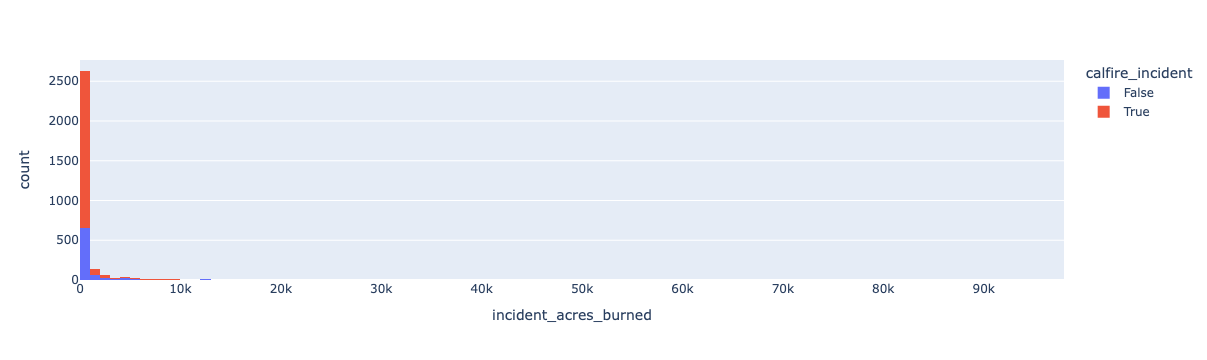

In [30]:
mask = (DF_raw["incident_acres_burned"] > 10) & (DF_raw["incident_acres_burned"] < 100000)
DF_mask = DF_raw[mask]


fig = px.histogram(DF_mask,
                 x = 'incident_acres_burned',
                  color = 'calfire_incident')
fig.show()

In [37]:
fire100k = DF_raw['incident_acres_burned'] > 100000
DF_100k = DF_raw[fire100k]
print(len(DF_100k))

largest_fire = DF_raw['incident_acres_burned'].idxmax()
print(largest_fire)


21
1653


In [12]:
# Extra Code


## Try reading in some data from Wikipedia - html

Here we will explore academy award winning films. Go to the [Wiki for the List of Academy Award Winning Films](https://en.wikipedia.org/wiki/List_of_Academy_Award%E2%80%93winning_films). Look at what type of data is there. How many tables? Any weird looking data?

Now we will read the html data into Python and show the data in DF[0]

In [38]:
# Here is some helper code
# This is code that will read in the data and then fix the Year column

#####
'''
NOTE: Many websites try to stop you from scraping even simple tables. 
    In just one year wikipedia made big changes... so I changed the code here.
    We can talk more about this code in class.
'''
import requests
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
}
my_website = "https://en.wikipedia.org/wiki/List_of_Academy_Award%E2%80%93winning_films"
response = requests.get(my_website, headers=headers)
#####

# Normal pandas code
DF = pd.read_html(response.content)
DF_raw = DF[0]
DF_raw['Year'] = DF_raw['Year'].apply(lambda x: int(x.split('/')[0]))
DF_raw

,Film,Year,Awards,Nominations
0,Anora,2024,5,6
1,The Brutalist,2024,3,10
2,Emilia Pérez,2024,2,13
3,Wicked,2024,2,10
4,Dune: Part Two,2024,2,5
...,...,...,...,...
1382,The Yankee Doodle Mouse,1943,1,1
1383,The Yearling,1946,2,7
1384,"Yesterday, Today and Tomorrow (Ieri, oggi, dom...",1964,1,1
1385,You Can't Take It with You,1938,2,7


**Q4** Following along with the lecture notes or video, fix the data in the 'Awards' column.

In [39]:
# Your code here
award_data = DF_raw['Awards'].value_counts()
DF_raw['Awards'] = DF_raw['Awards'].apply(lambda x: int(x.split('(')[0]))
DF_award = award_data.reset_index().rename(columns={"index": "value", 0: "count"})
DF_award

,Awards,count
0,1,988
1,2,159
2,3,78
3,4,47
4,0 (1),32
5,5,26
6,6,12
7,7,12
8,1 (1),8
9,8,7


**Q5** Now try to fix the data in the "Nominations" column - see if you can do it without looking at the answer.

In [42]:
# Your code here
nom_data = DF_raw['Nominations'].value_counts()
DF_nom = nom_data.reset_index().rename(columns={"index": "value", 0: "count"})
DF_nom
print('I can see that I want the data to the left of the [ character')

DF_raw['Nominations'] = DF_raw['Nominations'].apply(lambda x: int(x.split('[')[0]))
award_data = DF_raw['Awards'].value_counts()
DF_award = award_data.reset_index().rename(columns={"index": "value", 0: "count"})
DF_award

DF_raw.dtypes

I can see that I want the data to the left of the [ character


AttributeError: 'int' object has no attribute 'split'

## Problem 1

Your homework today will be to see if you can find some data of your own. This can be the first steps you take toward your final project. 

You should:

* Find some data online
* Read that data into Python using the Pandas commands we learned
* Look at the DataFrame - number of variables, number of observations, AND the dtypes. Comment on what you see.
* Try to do summary statistics (.describe()). Does it work like expected?
* Attempt to fix any data, or explain why the data does not need to be fixed.
* Make some sort of graph using columns in your data.